<a href="https://colab.research.google.com/github/michaelherediaperez/medio_continuo/blob/main/codigos/cap_03/03_00_taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Taylor

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Marzo 19, 2023 | Creando explicación |

## Teoría

**Tomado de: "Notas de clase, main.pdf"**

La serie de Taylor de una función real o compleja $f(x)$ que es infinitamente diferenciable en un vecindario de un número real o complejo $x_0$ está dada por la serie de potencias 
$$f(x_0 + \Delta_x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}\Delta x^n,$$
es decir 
$$f(x_0 + \Delta_x) = f(x_0) + \frac{f'(x_0)}{1!}\Delta x + \frac{f''(x_0)}{2!}\Delta x^2 + \frac{f'''(x_0)}{3!}\Delta x^3 + \dots ; $$

alternativamente, la expresión anterior se puede escribir, haciendo $\Delta x = x-x_0$, como:
$$f(x_0) = f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \frac{f'''(x_0)}{3!}(x-x_0)^3 + \dots , $$

aquí $n!$ denota el factorial del númerno $n$ y $f^{(n)}(x_0)$ denota la derivada $n-$ésima de $f$ evaluada en el punto $(x_0)$; la derivada cero de $f$, es decir, $f^{(0)}$, se define como la función $f$ misma y los términos $\Delta x^0$ y $0!$ son ambos iguales a 1.

En el caso particular que $x_0 = 0$, la serie de Taylor se conoce también como *la serie de Maclaurin*

**Complementar**

Para ver ejemplos y animaciones revisar los siguientes videos:
- Video: [Series de Taylor | Un Resultado MUY IMPORTANTE en FÍSICA](https://youtu.be/NY85ZX_NHmY)
- Video: [Series de Taylor | Capítulo 10, La esencia del cálculo](https://www.youtube.com/watch?v=3d6DsjIBzJ4&ab_channel=3Blue1Brown)

A continuación aprenderemos cómo calcular aproximaciones por series de Taylor y entender las series truncadas mediante algunos gráficos.


In [1]:
import sympy as sp                  # Cálculo simbólico    

# Para imprimir bonito
sp.init_printing()
from IPython.display import Math                 
def imprimir (texto, variable):
    return Math(texto +  rf'{sp.latex(variable)}')

## Aproximación por series de Taylor de la función seno y coseno

Definimos una función que se encargue de calcular las derivadas respectivas según sea el orden del polinomio de Taylor $T_n(x)$ requerido. 

In [2]:
def series_taylor(f, n, x0 = 0):
    """
    Función para calcular el polinomio de Taylor de orden n asodiado f de en 
    términos de "x".
    
    input:
    - f  : función a aproximar
    - n  : orden del truncamiento
    - x0 : centro de la serie, por defecto centrado en a=0 (serie de Maclaurin)
    
    output:
    - pol : polinomio truncado de Taylor de orden n. 
    """
    x = sp.Symbol("x")
    pol = f.subs(x, x0)

    for i in range(1, n+1):
        pol += sp.diff(f, x, i).subs(x, x0)*(x-x0)**i / sp.factorial(i) 
        
    return pol

Es de anotar que la aproximación de las funciones $\sin x$ y $\cos x$ son, respectivamente: $$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} + \frac{x^7}{7!} + \dots + (-1)^n\frac{x^{2n+1}}{(2n+1)!} + \dots , \forall x \in \mathbb{R}$$
$$\cos x = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} + \frac{x^6}{6!} + \dots + (-1)^n\frac{x^{2n}}{(2n)!} + \dots , \forall x \in \mathbb{R}$$

Vemos que la función seno solo tiene polinomios de orden $n$ impares, mientras que la función coseno, pares.

In [3]:
x = sp.Symbol("x")

pol_sin = []
pol_cos = []

for i in range(1, 7):
    if i == 1:
        pol_cos.append(series_taylor(sp.cos(x), i))
        pol_sin.append(series_taylor(sp.sin(x), i))
    elif i%2 == 0:
        pol_cos.append(series_taylor(sp.cos(x), i))
    else:
        pol_sin.append(series_taylor(sp.sin(x), i))

### Función sin(x)
Veamos los polinomios de Taylor y su representación gráfica (note que estamos graficando con sympy):

In [4]:
imprimir(rf"T_{1}(x_0) = ", pol_sin[0])

<IPython.core.display.Math object>

In [5]:
imprimir(rf"T_{3}(x_0) = ", pol_sin[1])

<IPython.core.display.Math object>

In [6]:
imprimir(rf"T_{5}(x_0) = ", pol_sin[2])

<IPython.core.display.Math object>

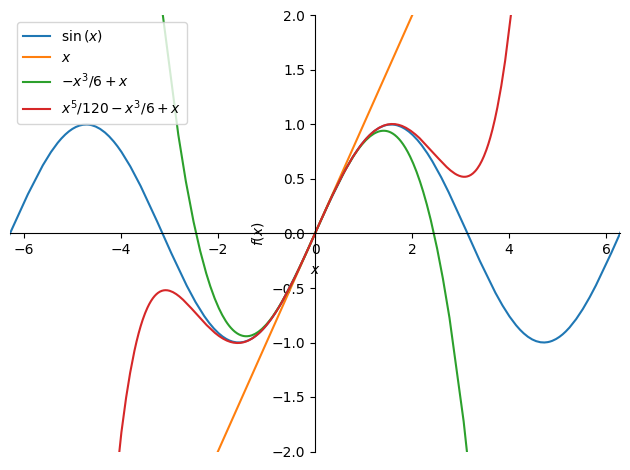

In [7]:
# Grafico la función sin(x)
fig = sp.plot(sp.sin(x), 
              xlim   = (-2*sp.pi, 2*sp.pi), 
              ylim   = (-2, 2), 
              legend = True, 
              show   = False)

# Añado las gráficas de cada polinomio de Taylor al "fig" sin presentarlas
for poli in pol_sin:
    fig.extend(
        sp.plot(poli, 
                xlim   = (-2*sp.pi, 2*sp.pi), 
                ylim   = (-2, 2), 
                legend = True, 
                show   = False))

fig.show()

### Función cos(x)
Veamos los polinomios de Taylor y su representación gráfica (note que estamos graficando con sympy):

In [8]:
imprimir(rf"T_{1}(x_0) = ", pol_cos[0])

<IPython.core.display.Math object>

In [9]:
imprimir(rf"T_{2}(x_0) = ", pol_cos[1])

<IPython.core.display.Math object>

In [10]:
imprimir(rf"T_{4}(x_0) = ", pol_cos[2])

<IPython.core.display.Math object>

In [11]:
imprimir(rf"T_{6}(x_0) = ", pol_cos[3])

<IPython.core.display.Math object>

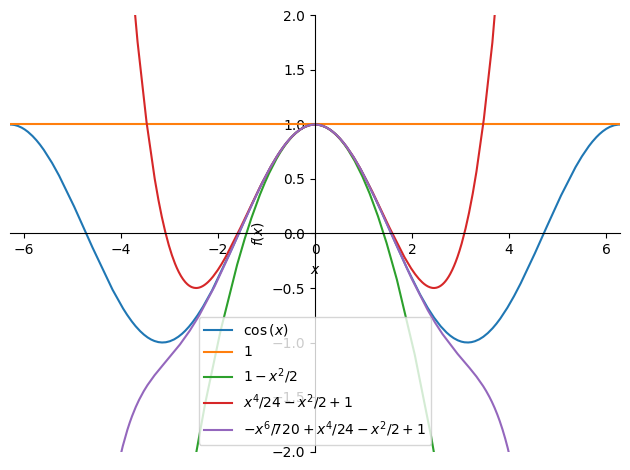

In [12]:
# Grafico la función cos(x)
fig = sp.plot(sp.cos(x), 
              xlim   = (-2*sp.pi, 2*sp.pi), 
              ylim   = (-2, 2), 
              legend = True, 
              show   = False)

# Añado las gráficas de cada polinomio de Taylor al "fig" sin presentarlas
for poli in pol_cos:
    fig.extend(
        sp.plot(poli, 
                xlim   = (-2*sp.pi, 2*sp.pi), 
                ylim   = (-2, 2), 
                legend = True, 
                show   = False))

fig.show()